In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# House data to create a model to predict house prices based off of existing features.

In [2]:
df = pd.read_csv("C:\\Users\\emman\\kaggle datasets\\USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['avg._area_income', 'avg._area_house_age', 'avg._area_number_of_rooms',
       'avg._area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [6]:
df.isnull().sum()

avg._area_income                0
avg._area_house_age             0
avg._area_number_of_rooms       0
avg._area_number_of_bedrooms    0
area_population                 0
price                           0
address                         0
dtype: int64

In [7]:
df['price'] = np.log1p(df['price'])
df['price']

0       13.872868
1       14.224896
2       13.872825
3       14.047112
4       13.354973
          ...    
4995    13.873963
4996    14.209320
4997    13.845778
4998    13.996713
4999    14.077068
Name: price, Length: 5000, dtype: float64

In [8]:
object = list(df.dtypes[df.dtypes == 'object'].index)
object

['address']

In [9]:
for col in object:
    df[col] = df[col].str.lower()

In [10]:
df.index.names = ['index_col']

In [11]:
df.head()

,avg._area_income,avg._area_house_age,avg._area_number_of_rooms,avg._area_number_of_bedrooms,area_population,price,address
index_col,,,,,,,
0,79545.458574,5.682861,7.009188,4.09,23086.800503,13.872868,"208 michael ferry apt. 674\nlaurabury, ne 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,14.224896,"188 johnson views suite 079\nlake kathleen, ca..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,13.872825,"9127 elizabeth stravenue\ndanieltown, wi 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,14.047112,uss barnett\nfpo ap 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,13.354973,usns raymond\nfpo ae 09386


In [12]:
df.describe()

,avg._area_income,avg._area_house_age,avg._area_number_of_rooms,avg._area_number_of_bedrooms,area_population,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,13.975406
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,0.336578
min,17796.631190,2.644304,3.236194,2.000000,172.610686,9.676565
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,13.813086
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,14.024693
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,14.201597
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,14.719351


# Exploratory Data Analysis 

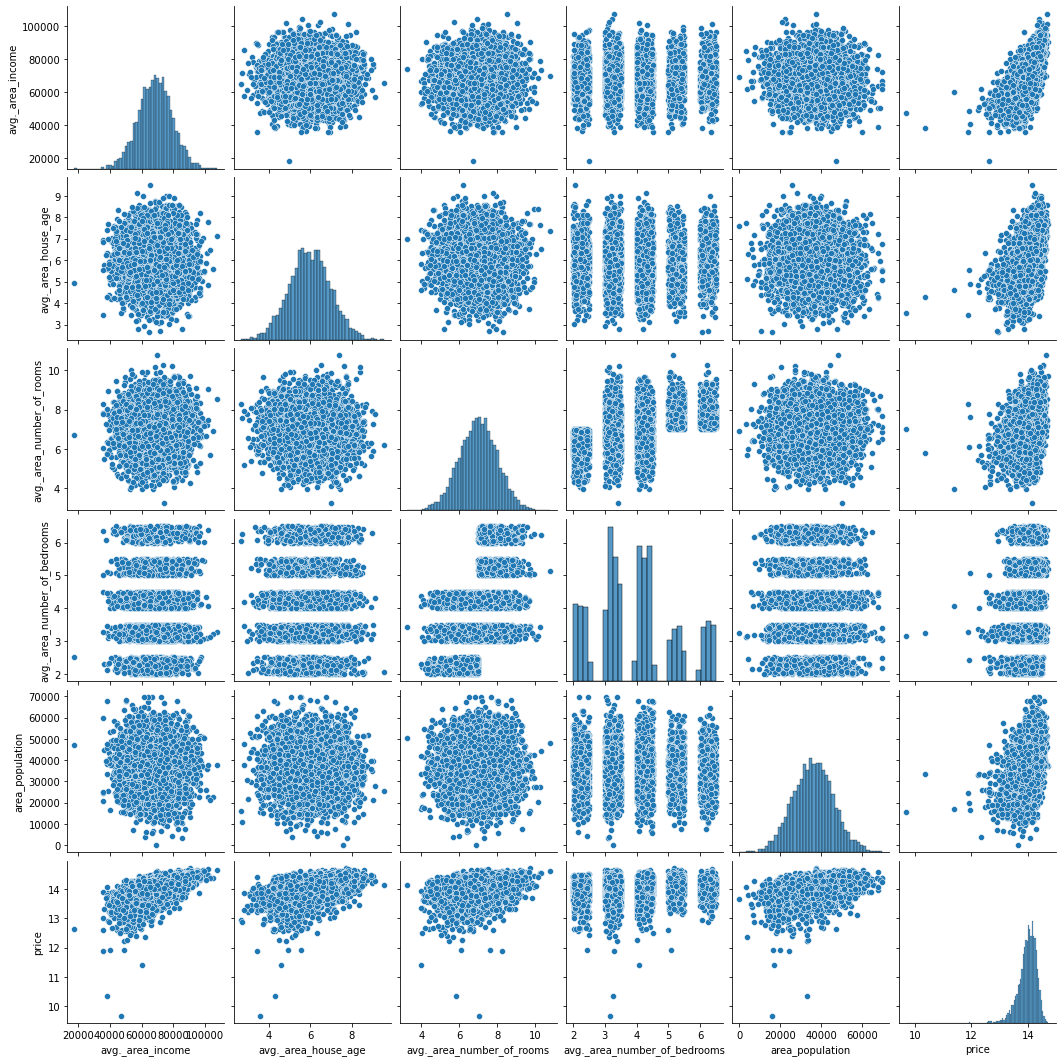

In [13]:
sns.pairplot(df)

#show if the price uniformly distributed

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

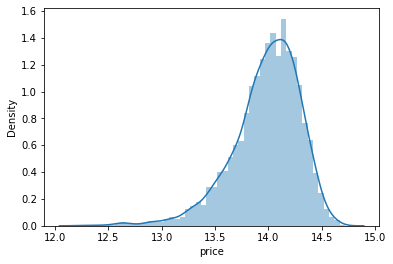

In [14]:
sns.distplot(df['price'][df['price']>12], bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

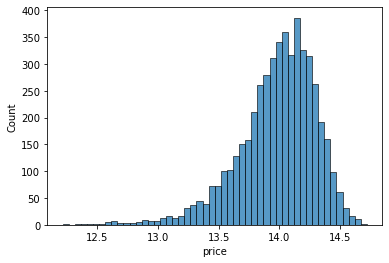

In [15]:
sns.histplot(df['price'][df['price']>12], bins=50)

In [16]:
df.corr()                     #check the correlation of the features to price

,avg._area_income,avg._area_house_age,avg._area_number_of_rooms,avg._area_number_of_bedrooms,area_population,price
avg._area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.608879
avg._area_house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.433434
avg._area_number_of_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.319949
avg._area_number_of_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.165460
area_population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.387563
price,0.608879,0.433434,0.319949,0.165460,0.387563,1.000000


<AxesSubplot:>

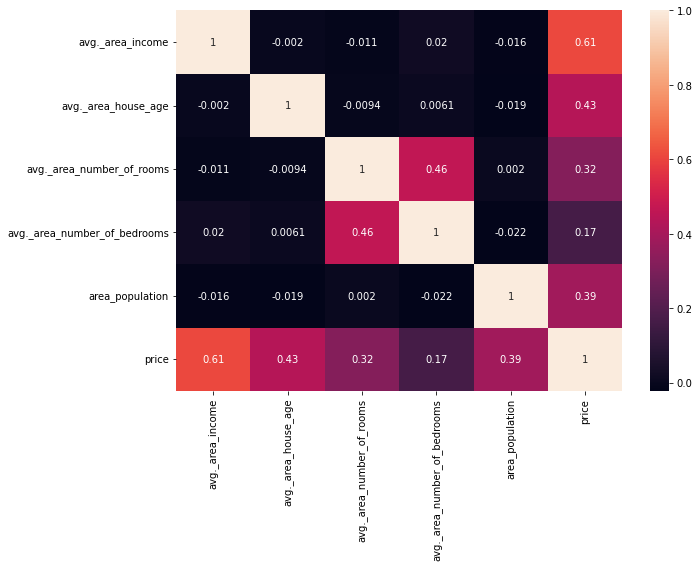

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

# Setting up the Validation Framework

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_test), len(df_val)

(3000, 1000, 1000)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

In [23]:
del df_train['price']
del df_val['price']
del df_test['price']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

In [25]:
dict_train = df_train.to_dict(orient='records')

In [26]:
dv = DictVectorizer(sparse=False)

In [27]:
X_train = dv.fit_transform(dict_train)

In [28]:
X_train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.05787205e+04, 4.08000000e+00, 5.98569242e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.01385126e+04, 4.37000000e+00, 6.59978918e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.07093539e+04, 3.18000000e+00, 6.82205870e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.55514030e+04, 2.48000000e+00, 6.44101497e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.27238766e+04, 6.39000000e+00, 8.12457109e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.21074281e+04, 3.00000000e+00, 6.98198430e+00]])

In [29]:
LR = LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression()

In [31]:
w0 = LR.intercept_
w0

10.461677536580869

In [32]:
w = LR.coef_
w

array([-5.21015482e-03,  2.81970236e-02,  1.11880182e-02, ...,
        1.97757434e-05,  3.68102567e-03,  1.07071624e-01])

#put the above in a function:

In [33]:
def train(df_train, y_train):
    dict_train = df_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dict_train)
    
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    
    return w0, w, dv, LR

In [34]:
w0, w, dv, LR = train(df_train, y_train)
w0, w

(10.461677536580869,
 array([-5.21015482e-03,  2.81970236e-02,  1.11880182e-02, ...,
         1.97757434e-05,  3.68102567e-03,  1.07071624e-01]))

In [35]:
dict_val = df_val.to_dict(orient='records')

In [36]:
X_val = dv.transform(dict_val)

In [37]:
X_val

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.06907186e+04, 3.42000000e+00, 7.02178745e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.43145062e+04, 6.49000000e+00, 7.06570957e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.44408889e+04, 4.36000000e+00, 4.82754287e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.87993016e+04, 4.24000000e+00, 5.05846071e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.09722405e+04, 4.30000000e+00, 8.05048709e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.92560729e+04, 3.44000000e+00, 4.96494832e+00]])

In [38]:
y_pred = LR.predict(X_val)

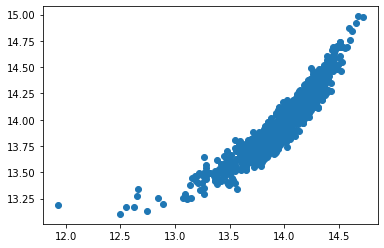

In [39]:
plt.scatter(y_val, y_pred)

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mse = mean_squared_error(y_pred, y_val)
mse

0.014788861087677798

In [42]:
rmse = np.sqrt(mse)
rmse

0.1216094613411218

In [43]:
def predict(df, dv, LR):
    dict_val = df_val.to_dict(orient='records')
    
    X_val = dv.transform(dict_val)
    y_pred = LR.predict(X_val)
    
    mse = mean_squared_error(y_pred, y_val)
    rmse = np.sqrt(mse)
    
    return rmse

In [44]:
predict(df_val, dv, LR)

0.1216094613411218

# Using Ridge regression for our model

In [45]:
from sklearn.linear_model import Ridge

In [46]:
mod_rid = Ridge(solver='sag', alpha=0, random_state=42)

In [47]:
mod_rid.fit(X_train, y_train)

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0, random_state=42, solver='sag')

In [48]:
w = mod_rid.coef_
w

array([1.09408738e-07, 2.22803575e-08, 1.14567386e-07, ...,
       1.95980553e-05, 7.22453046e-05, 1.19950905e-04])

In [49]:
def train_ridge(df_train, y_train, alpha):
    dict_train = df_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dict_train)
    
    mod_rid = Ridge(solver='sag', alpha=0, random_state=42)
    mod_rid.fit(X_train, y_train)
    
    return w, dv, mod_rid

In [50]:
def predict(df, dv, mod_rid):
    dict_val = df_val.to_dict(orient='records')
    
    X_val = dv.transform(dict_val)
    y_pred = mod_rid.predict(X_val)
    
    mse = mean_squared_error(y_pred, y_val)
    rmse = np.sqrt(mse)
    
    return rmse

In [51]:
predict(df_val, dv, mod_rid)

0.22029335657280918

#trying different values for alpha:

In [52]:
alpha = [0.001, 0.01, 0.1, 1, 10]

In [53]:
for a in alpha:
    
    w, dv, mod_rid = train_ridge(df_train, y_train, alpha=a)
    rmse = predict(df_val, dv, mod_rid)
    
    print('a=%s ---> %s' % (a, rmse))

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


a=0.001 ---> 0.22029335657280918


C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


a=0.01 ---> 0.22029335657280918


C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


a=0.1 ---> 0.22029335657280918


C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


a=1 ---> 0.22029335657280918
a=10 ---> 0.22029335657280918


C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Testing our model with Linear Regression

In [54]:
df_full_train = df_full_train.reset_index(drop=True)

In [55]:
y_full_train = df_full_train['price'].values

In [56]:
del df_full_train['price']

In [57]:
df_full_train.head()

,avg._area_income,avg._area_house_age,avg._area_number_of_rooms,avg._area_number_of_bedrooms,area_population,address
0,68562.024528,6.317286,7.305647,3.22,35476.168798,"11493 miles port apt. 517\nbradleymouth, ia 22..."
1,68656.906773,7.354458,8.787908,6.36,43833.853437,"6258 shirley lock suite 916\nnorth craig, hi 8..."
2,57869.268480,5.625299,7.601622,3.39,31818.932565,"67127 castillo row\nsouth brittany, gu 31115-2304"
3,68844.764249,4.860453,6.916808,3.29,48392.497360,unit 3192 box 6415\ndpo ap 76779-7624
4,62041.428293,6.692078,7.121939,3.25,46069.976912,"1500 chen tunnel\nport williamburgh, nm 21980-..."


In [58]:
def train(df_full_train, y_full_train):
    dict_full_train = df_full_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(dict_full_train)
    
    LR = LinearRegression()
    LR.fit(X_full_train,y_full_train)
    
    return dv, LR

In [59]:
def predict(df, dv, LR):
    dict_test = df_test.to_dict(orient='records')
    
    X_test = dv.transform(dict_test)
    y_pred = LR.predict(X_test)
    
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mse)
    
    return rmse

In [60]:
rmse = predict(df_test, dv, LR)
rmse

0.15617346686055

In [61]:
dv, LR = train(df_full_train, y_full_train)
rmse = predict(df_test, dv, LR)
rmse

0.1564233414342581

In [62]:
house_ten = df_test.iloc[10].to_dict()
house_ten

{'avg._area_income': 55340.608735324255,
 'avg._area_house_age': 5.231696666386671,
 'avg._area_number_of_rooms': 5.614293707083566,
 'avg._area_number_of_bedrooms': 4.3,
 'area_population': 34112.97062220211,
 'address': '489 john locks\nwest kylestad, il 55787-7291'}

In [63]:
df_house_ten = pd.DataFrame([house_ten])
df_house_ten

,avg._area_income,avg._area_house_age,avg._area_number_of_rooms,avg._area_number_of_bedrooms,area_population,address
0,55340.608735,5.231697,5.614294,4.3,34112.970622,"489 john locks\nwest kylestad, il 55787-7291"


In [64]:
dict_ten = df_house_ten.to_dict(orient='records')

In [65]:
X_ten = dv.transform(dict_ten)

In [66]:
y_pred_ten = LR.predict(X_ten)    

In [67]:
y_pred_ten

array([13.43317174])

In [68]:
predicted_price = np.expm1(y_pred_ten[0])
predicted_price

682262.8523818636

In [69]:
actual_price = np.expm1(y_test[10])
actual_price

565937.2005531767

In [70]:
print('predicted_price :', predicted_price.round(3))
print('actual_price :', actual_price.round(3))

predicted_price : 682262.852
actual_price : 565937.201


In [ ]:
# Save the model

In [84]:
import pickle

In [85]:
output_file = 'LR.bin'
output_file

'LR.bin'

In [86]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, LR), f_out)

# Load the file

In [3]:
import pickle

In [4]:
model_file = 'LR.bin'

In [5]:
with open(model_file, 'rb') as f_in:
    dv, LR = pickle.load(f_in)

In [6]:
dv, LR

(DictVectorizer(sparse=False), LinearRegression())